# Veri Toplama ve Grup İşlemleri
    Bir veri kümesini kategorize etmek ve bir toplama veya dönüştürme olsun, her gruba bir işlev uygulamak, genellikle bir veri analizi iş akışının kritik bir bileşenidir. Bir veri kümesini yükledikten, birleştirdikten ve hazırladıktan sonra, raporlama veya görselleştirme amacıyla grup istatistiklerini veya muhtemelen pivot tabloları hesaplamanız gerekebilir. Pandas, veri kümelerini doğal bir şekilde dilimlemenize, parçalara ayırmanıza ve özetlemenize olanak tanıyan esnek bir grup arabirimi sağlar.

    İlişkisel veri tabanlarının ve SQL'in popüler olmasının bir nedeni, verilerin birleştirilebilmesi, filtrelenmesi, dönüştürülmesi ve toplanabilme kolaylığıdır. Bununla birlikte, SQL gibi sorgu dilleri, gerçekleştirilebilecek grup işlemleri türlerinde bir şekilde sınırlıdır. Göreceğiniz gibi, Python ve pandaların ifade gücüyle, bir pandas nesnesini veya NumPy dizisini kabul eden herhangi bir işlevi kullanarak oldukça karmaşık grup işlemleri gerçekleştirebiliriz. Bu bölümde aşağıdakilerin nasıl yapılacağını öğreneceksiniz:
    • Pandas nesnesini bir veya daha fazla anahtar kullanarak parçalara ayırın (işlevler, diziler veya DataFrame sütun adları biçiminde)
    • Sayım, ortalama veya standart sapma veya kullanıcı tanımlı bir işlev gibi grup özet istatistiklerini hesaplayın
    • Grup içi dönüşümleri veya normalleştirme, doğrusal regresyon, sıralama veya alt küme seçimi gibi diğer işlemleri uygulayın
    • Özet tabloları ve çapraz tabloları hesaplayın
    • Nicelik analizi ve diğer istatistiksel grup analizlerini gerçekleştirin

# 10.1 GroupBy Mechanics
    bir DataFrame satırları (eksen = 0) veya sütunları (eksen = 1) üzerinde gruplanabilir. Bu yapıldıktan sonra, her gruba yeni bir değer üreten bir işlev uygulanır. Son olarak, tüm bu fonksiyon uygulamalarının sonuçları bir sonuç nesnesi olarak birleştirilir. Ortaya çıkan nesnenin şekli genellikle verilere ne yapıldığına bağlı olacaktır.

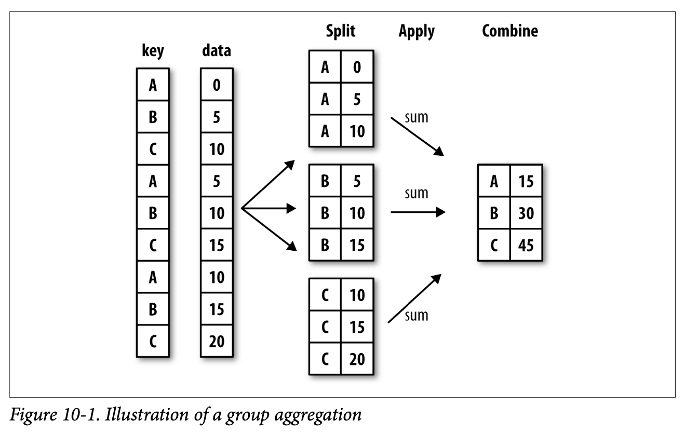

In [1]:
from IPython.display import Image
Image("img/picture72.png")

    Her gruplama anahtarı birçok biçimde olabilir ve anahtarların hepsinin aynı türde olması gerekmez:
    • Gruplanmakta olan eksenle aynı uzunlukta olan bir değerler listesi veya dizisi • DataFrame'deki bir sütun adını belirten bir değer
    • Gruplanan eksendeki değerler ile grup isimleri arasında bir yazışma veren bir dikte veya Seri
    • Eksen dizininde veya dizindeki tek tek etiketlerde çağrılacak bir işlev

    Son üç yöntemin, nesneyi bölmek için kullanılacak bir dizi değer üretmek için kısayollar olduğunu unutmayın. 

In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})

In [3]:
df

,key1,key2,data1,data2
0,a,one,-0.399197,-1.392406
1,a,two,-0.583593,0.041499
2,b,one,-1.378632,0.182173
3,b,two,-0.205171,-0.352032
4,a,one,-0.183798,2.131064


    Key1'deki etiketleri kullanarak data1 sütununun ortalamasını hesaplamak istediğinizi varsayalım. Bunu yapmanın çeşitli yolları var. Birincisi data1'e erişmek ve groupby'yi key1'deki sütun (a Series) ile aramaktır.

In [4]:
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped

    Bu gruplanmış değişken artık bir GroupBy nesnesidir. Grup anahtarı df ['key1'] ile ilgili bazı ara veriler dışında henüz hiçbir şey hesaplamadı. Buradaki fikir, bu nesnenin daha sonra grupların her birine bazı işlemler uygulamak için gereken tüm bilgilere sahip olmasıdır. Örneğin, grubu hesaplamak, GroupBy’nin ortalama yöntemini çağırabileceğimiz anlamına gelir.

In [6]:
grouped.mean()

key1
a   -0.388863
b   -0.791901
Name: data1, dtype: float64

    Bunun yerine birden çok diziyi bir liste olarak geçirseydik, farklı bir şey elde ederdik.

In [7]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [8]:
means

key1  key2
a     one    -0.291498
      two    -0.583593
b     one    -1.378632
      two    -0.205171
Name: data1, dtype: float64

    Burada verileri iki key kullanarak grupladık ve ortaya çıkan Seri artık gözlemlenen benzersiz key çiftlerinden oluşan hiyerarşik bir dizine sahip.

In [9]:
means.unstack()

key2,one,two
key1,,
a,-0.291498,-0.583593
b,-1.378632,-0.205171


    Bu örnekte, grup anahtarlarının tümü Seridir, ancak bunlar doğru uzunlukta herhangi bir dizi olabilir.

In [10]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])

In [11]:
years = np.array([2005, 2005, 2006, 2005, 2006])

In [12]:
df['data1'].groupby([states, years]).mean()

California  2005   -0.583593
            2006   -1.378632
Ohio        2005   -0.302184
            2006   -0.183798
Name: data1, dtype: float64

    Çoğunlukla gruplama bilgileri, üzerinde çalışmak istediğiniz verilerle aynı DataFrame'de bulunur. Bu durumda, sütun adlarını (dizeler, sayılar veya diğer Python nesneleri) grup anahtarları olarak geçirebilirsiniz.

In [13]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.388863,0.260053
b,-0.791901,-0.084929


In [14]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.291498  0.369329
     two  -0.583593  0.041499
b    one  -1.378632  0.182173
     two  -0.205171 -0.352032

    İlk durumda df.groupby ('key1']. Yani () sonuçta key2 sütunu olmadığını fark etmiş olabilirsiniz. Df ['key2'] sayısal veri olmadığından, sorunlu bir sütun olduğu söylenir ve bu nedenle sonuçtan çıkarılır. Varsayılan olarak, tüm sayısal sütunlar toplanır, ancak bir alt kümeye göre filtreleme yapmak da mümkündür.

    Groupby kullanmanın amacı ne olursa olsun, genel olarak kullanışlı bir GroupBy yöntemi boyuttur ve grup boyutlarını içeren bir Seri döndürür.

In [15]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

    Bir grup anahtarındaki eksik değerlerin sonuçtan çıkarılacağını unutmayın.

# Gruplar Üzerinde Yineleme
    GroupBy nesnesi yinelemeyi destekler, grup adını ve veri yığınını içeren bir 2-tuple dizisi oluşturur. Aşağıdakileri göz önünde bulundur:

In [16]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.399197 -1.392406
1    a  two -0.583593  0.041499
4    a  one -0.183798  2.131064
b
  key1 key2     data1     data2
2    b  one -1.378632  0.182173
3    b  two -0.205171 -0.352032


    Birden fazla anahtar olması durumunda, demetteki ilk öğe, anahtar değerlerinin bir demeti olacaktır.

In [17]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one -0.399197 -1.392406
4    a  one -0.183798  2.131064
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.583593  0.041499
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.378632  0.182173
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.205171 -0.352032


    Elbette, veri parçalarıyla istediğinizi yapmayı seçebilirsiniz. Veri parçalarının bir sınırını tek satırlık olarak hesaplamaktır.

In [18]:
pieces = dict(list(df.groupby('key1')))

In [19]:
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.378632,0.182173
3,b,two,-0.205171,-0.352032


    Varsayılan olarak, eksen = 0 üzerindeki gruplara göre gruplandırabilirsiniz, ancak diğer eksenlerin herhangi birinde gruplayabilirsiniz. Örneğin, burada df örneğimizin sütunlarını şu şekilde dtype ile gruplayabiliriz:

In [20]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [21]:
grouped = df.groupby(df.dtypes, axis=1)

    Grupları şu şekilde yazdırabiliriz:

In [22]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.399197 -1.392406
1 -0.583593  0.041499
2 -1.378632  0.182173
3 -0.205171 -0.352032
4 -0.183798  2.131064
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


# Sütun veya Sütun Alt Kümesini Seçme
    Bir DataFrame'den bir sütun adı veya sütun adları dizisi ile oluşturulan bir GroupBy nesnesinin dizine alınması, toplama için sütun alt kümeleme etkisine sahiptir. Bunun anlamı şudur ki:

In [23]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [24]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

    Özellikle büyük veri kümeleri için, yalnızca birkaç sütunun toplanması istenebilir. Örneğin, önceki veri kümesinde, yalnızca data2 sütunu için araçları hesaplamak ve sonucu DataFrame olarak almak için şunu yazabiliriz:

In [25]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.369329
     two   0.041499
b    one   0.182173
     two  -0.352032

    Bu indeksleme işlemi tarafından döndürülen nesne, bir liste veya dizi geçirilirse gruplanmış bir DataFrame veya skaler olarak yalnızca tek bir sütun adı geçirilirse gruplanmış bir Seridir.

In [26]:
s_grouped = df.groupby(['key1', 'key2'])['data2']

In [27]:
s_grouped

In [28]:
s_grouped.mean()

key1  key2
a     one     0.369329
      two     0.041499
b     one     0.182173
      two    -0.352032
Name: data2, dtype: float64

# Diktler ve Serilerle Gruplama
    Gruplama bilgileri, bir diziden farklı bir biçimde olabilir.

In [29]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [30]:
people.iloc[2:3, [1, 2]] = np.nan # Birkaç NA değeri ekleyin

In [31]:
people

,a,b,c,d,e
Joe,-0.445252,0.557591,0.720730,-0.950052,-0.690401
Steve,0.598614,-0.280635,-0.311785,0.261914,-0.568365
Wes,-1.452790,NaN,NaN,-0.146601,-0.134484
Jim,0.227724,-0.507082,0.959123,-0.435780,-1.416611
Travis,0.904868,-1.395759,0.744964,1.073613,0.168507


    Şimdi, sütunlar için bir grup yazışmam olduğunu ve sütunları gruplara göre toplamak istediğimi varsayalım.

In [32]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}

    Şimdi, bu dikteden groupby'ye geçmek için bir dizi oluşturabilirsiniz, ancak bunun yerine dikteyi geçebiliriz.

In [33]:
by_column = people.groupby(mapping, axis=1)

In [34]:
by_column.sum()

,blue,red
Joe,-0.229322,-0.578062
Steve,-0.049870,-0.250385
Wes,-0.146601,-1.587274
Jim,0.523343,-1.695969
Travis,1.818577,-0.322384


    Aynı işlevsellik, sabit boyutlu bir eşleme olarak görülebilen Seriler için de geçerlidir.

In [35]:
map_series = pd.Series(mapping)

In [36]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [37]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


# Fonlsiyonları Gruplama
    Python işlevlerini kullanmak, bir dikte veya Seriye kıyasla bir grup eşlemesini tanımlamanın daha genel bir yoludur. Grup anahtarı olarak iletilen herhangi bir işlev, her dizin değeri için bir kez çağrılır ve dönüş değerleri grup adları olarak kullanılır. Daha somut olarak, bir önceki bölümde yer alan ve indeks değerleri olarak insanların adlarının bulunduğu DataFrame örneğini düşünün. Adların uzunluğuna göre gruplamak istediğinizi varsayalım; dizi uzunluklarını hesaplayabilseniz de, yalnızca len işlevini geçirmek daha kolaydır:

In [38]:
people.groupby(len).sum()

,a,b,c,d,e
3,-1.670318,0.050508,1.679853,-1.532433,-2.241497
5,0.598614,-0.280635,-0.311785,0.261914,-0.568365
6,0.904868,-1.395759,0.744964,1.073613,0.168507


    Her şey dahili olarak dizilere dönüştürüldüğünden, fonksiyonları diziler, diktler veya Seriler ile karıştırmak sorun olmaz.

In [39]:
key_list = ['one', 'one', 'one', 'two', 'two']

In [40]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.452790  0.557591  0.720730 -0.950052 -0.690401
  two  0.227724 -0.507082  0.959123 -0.435780 -1.416611
5 one  0.598614 -0.280635 -0.311785  0.261914 -0.568365
6 two  0.904868 -1.395759  0.744964  1.073613  0.168507

# Dizin Düzeylerine Göre Gruplama
    Hiyerarşik olarak indekslenmiş veri kümeleri için son bir kolaylık, bir eksen indeksinin seviyelerinden birini kullanarak bir araya getirme yeteneğidir. Bir örneğe bakalım:

In [41]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])

In [42]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [43]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.143661  0.669795  0.874048  1.175805  0.930104
1      1.530062 -1.740579 -1.241398 -0.109193  0.268877
2     -1.170875 -0.158375 -1.354285 -1.331365  0.226714
3     -0.525477 -0.362784 -0.002955 -0.391789  0.028888

    Seviyeye göre gruplamak için, seviye anahtar kelimesini kullanarak seviye numarasını veya adını yazın.

In [44]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


# 10.2 Veri Toplama
    Toplamalar, dizilerden skaler değerler üreten herhangi bir veri dönüşümünü ifade eder. Önceki örnekler, ortalama, sayım, min ve toplam dahil olmak üzere birkaçını kullanmıştır. Bir GroupBy nesnesinde mean () 'ı çağırdığınızda neler olduğunu merak edebilirsiniz. Tablo 10-1'de bulunanlar gibi birçok yaygın toplamanın optimize edilmiş uygulamaları vardır. Ancak, yalnızca bu yöntemlerle sınırlı değilsiniz.

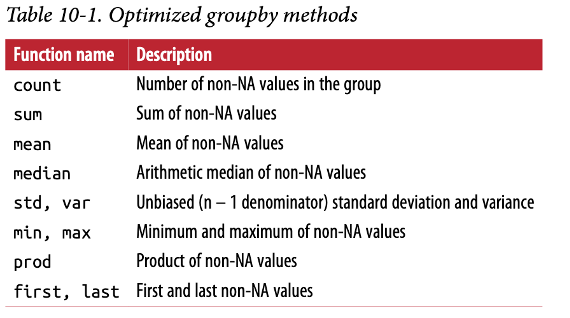

In [45]:
Image("img/picture73.png")

    Kendi tasarladığınız toplamaları kullanabilir ve ayrıca gruplanmış nesnede tanımlanan herhangi bir yöntemi de çağırabilirsiniz. Örneğin, nicel değerin bir Seri veya DataFrame sütunlarının örnek niceliklerini hesapladığını hatırlayabilirsiniz.

    Quantile, GroupBy için açıkça uygulanmasa da, bir Series yöntemidir ve bu nedenle kullanılabilir. GroupBy dahili olarak, Serileri verimli bir şekilde dilimler, her parça için piece.quantile (0.9) 'u çağırır ve ardından bu sonuçları bir araya getirerek sonuç nesnesi oluşturur.

In [46]:
df

,key1,key2,data1,data2
0,a,one,-0.399197,-1.392406
1,a,two,-0.583593,0.041499
2,b,one,-1.378632,0.182173
3,b,two,-0.205171,-0.352032
4,a,one,-0.183798,2.131064


In [47]:
grouped = df.groupby('key1')

In [48]:
grouped['data1'].quantile(0.9)

key1
a   -0.226878
b   -0.322517
Name: data1, dtype: float64

    Kendi toplama işlevlerinizi kullanmak için, bir diziyi toplayan herhangi bir işlevi toplama veya toplama yöntemine iletin.

In [49]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [50]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.399794,3.523470
b,1.173461,0.534204


    Tanımlama gibi bazı yöntemlerin, toplama olmasalar bile, kesinlikle işe yaradığını fark edebilirsiniz.

In [51]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0 -0.388863  0.200097 -0.583593 -0.491395 -0.399197 -0.291498   
b      2.0 -0.791901  0.829762 -1.378632 -1.085267 -0.791901 -0.498536   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a    -0.183798   3.0  0.260053  1.771873 -1.392406 -0.675453  0.041499   
b    -0.205171   2.0 -0.084929  0.377739 -0.352032 -0.218480 -0.084929   

                          
           75%       max  
key1                      
a     1.086282  2.131064  
b     0.048622  0.182173

# Sütun Bazında ve Çok Fonksiyonlu Uygulama
    Önceki örneklerden bahşiş veri kümesine dönelim. Read_csv ile yükledikten sonra, bir devrilme yüzdesi sütunu tip_pct ekliyoruz.

In [52]:
tips = pd.read_csv('examples/tips.csv')

In [53]:
# Toplam faturanın bahşiş yüzdesini ekleyin
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [54]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


    Daha önce gördüğünüz gibi, bir Seriyi veya bir DataFrame'in tüm sütunlarını toplamak, istenen işlevle toplamayı kullanma veya ortalama veya std gibi bir yöntemi çağırma meselesidir. Ancak, sütuna bağlı olarak farklı bir işlev veya aynı anda birden çok işlev kullanarak toplama yapmak isteyebilirsiniz. Neyse ki bunu yapmak mümkündür. İlk olarak, ipuçlarını güne ve sigara içen kişiye göre gruplayalım:

In [55]:
grouped = tips.groupby(['day', 'smoker'])

In [56]:
grouped_pct = grouped['tip_pct']

In [57]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

    Bunun yerine bir işlevler veya işlev adları listesi iletirseniz, işlevlerden alınan sütun adlarıyla bir DataFrame geri alırsınız.

In [58]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

    Burada, veri gruplarını bağımsız olarak değerlendirmek için bir toplama işlevleri listesi geçirdik.
    
    GroupBy'nin sütunlara verdiği adları kabul etmenize gerek yoktur; özellikle lambda işlevlerinin '<lambda>' adı vardır, bu da onları tanımlamayı zorlaştırır (bir işlevin __name__ özniteliğine bakarak kendiniz görebilirsiniz). Bu nedenle, bir (ad, işlev) tuple listesini iletirseniz, her demetin ilk öğesi DataFrame sütun adları olarak kullanılacaktır (2-başlıkların bir listesini sıralı bir eşleme olarak düşünebilirsiniz).

In [59]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

    Bir DataFrame ile, tüm sütunlara veya sütun başına farklı işlevlere uygulanacak bir işlev listesi belirleyebileceğiniz için daha fazla seçeneğiniz vardır. Başlangıç olarak, tip_pct ve total_bill sütunları için aynı üç istatistiği hesaplamak istediğimizi varsayalım.

In [60]:
functions = ['count', 'mean', 'max']

In [61]:
result = grouped['tip_pct', 'total_bill'].agg(functions)

<ipython-input-61-426117f1e146>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  result = grouped['tip_pct', 'total_bill'].agg(functions)


In [62]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

    Gördüğünüz gibi, sonuçta elde edilen DataFrame hiyerarşik sütunlara sahiptir, aynı her bir sütunu ayrı ayrı toplarsanız ve anahtarlar bağımsız değişkeni olarak sütun adlarını kullanarak sonuçları birbirine yapıştırmak için concat kullanırsınız.

In [63]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

    Daha önce olduğu gibi, özel adlara sahip bir tuples listesi aktarılabilir:

In [64]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]

In [65]:
grouped['tip_pct', 'total_bill'].agg(ftuples)

<ipython-input-65-c2b2ffd79840>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped['tip_pct', 'total_bill'].agg(ftuples)


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

    Şimdi, potansiyel olarak farklı işlevleri bir veya daha fazla sütuna uygulamak istediğinizi varsayalım. Bunu yapmak için, şu ana kadar listelenen işlev özelliklerinden herhangi birine sütun adlarının bir eşlemesini içeren bir dict to agg iletin.

In [66]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [67]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

    Bir DataFrame, yalnızca en az bir sütuna birden çok işlev uygulandığında hiyerarşik sütunlara sahip olacaktır.

# Satır Dizinleri Olmadan Toplu Verileri Döndürme
    Şimdiye kadarki tüm örneklerde, toplanan veriler, benzersiz grup anahtarı kombinasyonlarından oluşan potansiyel olarak hiyerarşik bir dizinle geri geliyor. Bu her zaman arzu edilmediğinden, bu davranışı çoğu durumda groupby'ye as_index = False değerini ileterek devre dışı bırakabilirsiniz.

In [68]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


    Elbette, sonucu reset_index'i çağırarak bu biçimde elde etmek her zaman mümkündür. As_index = False yönteminin kullanılması bazı gereksiz hesaplamaları önler.

# 10.3 Uygula: Genel bölme-uygula-birleştir
    Bu bölümün geri kalanının konusu olan en genel amaçlı GroupBy yöntemi uygulanır. Şekil 10-2'de gösterildiği gibi, uygula, işlenmekte olan nesneyi parçalara böler, her parçada geçirilen işlevi çağırır ve ardından parçaları birleştirmeye çalışır.

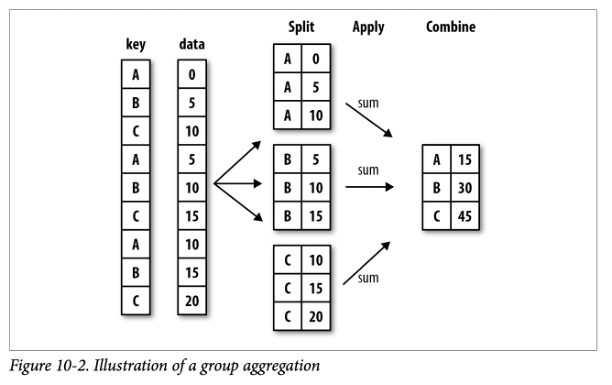

In [69]:
Image("img/picture74.png")

    Önceki bahşiş veri kümesine dönersek, gruba göre ilk beş tip_pct değerini seçmek istediğinizi varsayalım. İlk olarak, belirli bir sütundaki en büyük değerlere sahip satırları seçen bir işlev yazın.

In [70]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [71]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


    Şimdi, sigara içenlere göre gruplandırırsak, söylersek ve bu işlevle uygula'yı çağırırsak, aşağıdakileri elde ederiz:

In [72]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

    Burada ne oldu? Top işlevi DataFrame'den her satır grubunda çağrılır ve ardından sonuçlar pandas.concat kullanılarak birbirine yapıştırılır ve parçalar grup adlarıyla etiketlenir. Bu nedenle sonuç, iç seviyesi orijinal DataFrame'den dizin değerlerini içeren hiyerarşik bir dizine sahiptir.

    Başka argümanlar veya anahtar sözcükler alan bir işlevi uygulamaya geçirirseniz, bunları işlevden sonra iletebilirsiniz.

In [73]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [74]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [75]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [76]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

    Grup İçinde Tanımla gibi bir yöntemi çağırdığınızda, bu aslında şunun kısaltmasıdır:

In [77]:
f = lambda x: x.describe()
grouped.apply(f)

total_bill       tip  size   tip_pct
day  smoker                                            
Fri  No     count    4.000000  4.000000  4.00  4.000000
            mean    18.420000  2.812500  2.25  0.151650
            std      5.059282  0.898494  0.50  0.028123
            min     12.460000  1.500000  2.00  0.120385
            25%     15.100000  2.625000  2.00  0.137239
...                       ...       ...   ...       ...
Thur Yes    min     10.340000  2.000000  2.00  0.090014
            25%     13.510000  2.000000  2.00  0.148038
            50%     16.470000  2.560000  2.00  0.153846
            75%     19.810000  4.000000  2.00  0.194837
            max     43.110000  5.000000  4.00  0.241255

[64 rows x 4 columns]

# Grup Anahtarlarını Bastırma
    Önceki örneklerde, ortaya çıkan nesnenin, orijinal nesnenin her bir parçasının dizinleri ile birlikte grup anahtarlarından oluşan bir hiyerarşik dizine sahip olduğunu görüyorsunuz. Bunu group_keys = False öğesini groupby'ye ileterek devre dışı bırakabilirsiniz.

In [78]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


# Nicelik ve Bucket Analizi

In [79]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})

In [80]:
quartiles = pd.cut(frame.data1, 4)

In [81]:
quartiles[:10]

0     (-0.121, 1.471]
1    (-1.713, -0.121]
2     (-0.121, 1.471]
3    (-1.713, -0.121]
4     (-0.121, 1.471]
5      (1.471, 3.063]
6    (-3.312, -1.713]
7     (-0.121, 1.471]
8     (-0.121, 1.471]
9    (-1.713, -0.121]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.312, -1.713] < (-1.713, -0.121] < (-0.121, 1.471] < (1.471, 3.063]]

    Kesmeyle döndürülen Kategorik nesne doğrudan groupby'ye aktarılabilir. Böylece, data2 sütunu için şu şekilde bir dizi istatistik hesaplayabiliriz.

In [82]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

In [83]:
grouped = frame.data2.groupby(quartiles)

In [84]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.312, -1.713]",-2.035234,2.185491,35.0,0.107557
"(-1.713, -0.121]",-3.317860,2.903081,402.0,-0.052531
"(-0.121, 1.471]",-3.215114,2.457543,494.0,-0.022288
"(1.471, 3.063]",-2.051406,2.529880,69.0,0.199493


In [85]:
grouping = pd.qcut(frame.data1, 10, labels=False)

In [86]:
grouped = frame.data2.groupby(grouping)

In [87]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.040926,2.364725,100.0,0.079744
1,-2.322944,2.107722,100.0,-0.057665
2,-2.027871,2.903081,100.0,0.036003
3,-3.317860,2.201497,100.0,-0.167696
4,-2.103088,2.037555,100.0,-0.145220
5,-3.215114,2.287420,100.0,0.117786
6,-2.444351,2.295160,100.0,-0.109730
7,-1.423907,2.139066,100.0,-0.079800
8,-2.924371,2.457543,100.0,0.006001


# Örnek: Eksik Değerleri Gruba Özgü Değerlerle Doldurma
    Eksik verileri temizlerken, bazı durumlarda veri gözlemlerini dropna kullanarak değiştirirsiniz, ancak diğerlerinde boş (NA) değerleri sabit bir değer veya verilerden türetilen bir değer kullanarak atamak (doldurmak) isteyebilirsiniz. fillna, kullanılacak doğru araçtır; örneğin, burada NA değerlerini ortalamayla dolduralım.

In [88]:
s = pd.Series(np.random.randn(6))

In [89]:
s[::2] = np.nan

In [90]:
s

0         NaN
1    0.387622
2         NaN
3   -1.140526
4         NaN
5   -0.772338
dtype: float64

In [91]:
s.fillna(s.mean())

0   -0.508414
1    0.387622
2   -0.508414
3   -1.140526
4   -0.508414
5   -0.772338
dtype: float64

    Gruba göre değişmek için doldurma değerine ihtiyacınız olduğunu varsayalım. Bunu yapmanın bir yolu, verileri gruplamak ve her veri yığınında fillna'yı çağıran bir işlevle uygula kullanmaktır. Doğu ve batı bölgelerine bölünmüş ABD eyaletleriyle ilgili bazı örnek veriler.

In [92]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

In [93]:
group_key = ['East'] * 4 + ['West'] * 4

In [94]:
data = pd.Series(np.random.randn(8), index=states)

In [95]:
data

Ohio          0.175345
New York     -0.806473
Vermont      -0.546296
Florida       1.068155
Oregon        0.245295
Nevada       -0.957322
California    1.217878
Idaho        -0.238817
dtype: float64

    ['Doğu'] * 4 sözdiziminin, ['Doğu'] 'daki öğelerin dört kopyasını içeren bir liste oluşturduğuna dikkat edin. Listeleri birbirine eklemek onları birleştirir.

    Verilerdeki bazı değerleri eksik olarak ayarlayalım.

In [96]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [97]:
data

Ohio          0.175345
New York     -0.806473
Vermont            NaN
Florida       1.068155
Oregon        0.245295
Nevada             NaN
California    1.217878
Idaho              NaN
dtype: float64

In [98]:
data.groupby(group_key).mean()

East    0.145676
West    0.731587
dtype: float64

    NA değerlerini şu şekilde grup araçlarını kullanarak doldurabiliriz:

In [99]:
fill_mean = lambda g: g.fillna(g.mean())

In [100]:
data.groupby(group_key).apply(fill_mean)

Ohio          0.175345
New York     -0.806473
Vermont       0.145676
Florida       1.068155
Oregon        0.245295
Nevada        0.731587
California    1.217878
Idaho         0.731587
dtype: float64

    Başka bir durumda, kodunuzda gruba göre değişen önceden tanımlanmış dolgu değerleriniz olabilir. Grupların dahili olarak ayarlanmış bir ad özniteliği olduğundan, bunu kullanabiliriz.

In [101]:
fill_values = {'East': 0.5, 'West': -1}

In [102]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [103]:
data.groupby(group_key).apply(fill_func)

Ohio          0.175345
New York     -0.806473
Vermont       0.500000
Florida       1.068155
Oregon        0.245295
Nevada       -1.000000
California    1.217878
Idaho        -1.000000
dtype: float64

# Örnek: Rastgele Örnekleme ve Permütasyon
    Monte Carlo simülasyonu veya başka bir uygulama için büyük bir veri kümesinden rastgele bir örnek (değiştirilerek veya değiştirilmeden) çekmek istediğinizi varsayalım. "Çekilişleri" gerçekleştirmenin birkaç yolu vardır; burada Seri için örnek yöntemi kullanıyoruz.

In [104]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

    Şimdi, indeksi kart adlarını içeren ve değerleri Blackjack ve diğer oyunlarda kullanılan uzunluklu 52 bir Serimiz var (işleri basitleştirmek için sadece as 'A' 1 olsun).

In [105]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [106]:
def draw(deck, n=5):
    return deck.sample(n)

In [107]:
draw(deck)

KH    10
QS    10
5H     5
4C     4
8H     8
dtype: int64

    Her takımdan iki rastgele kart istediğinizi varsayalım. Takım, her kart adının son karakteri olduğu için, buna göre gruplayabilir ve uygulayabiliriz.

In [108]:
get_suit = lambda card: card[-1]

In [109]:
deck.groupby(get_suit).apply(draw, n=2)

C  8C      8
   5C      5
D  3D      3
   JD     10
H  6H      6
   10H    10
S  9S      9
   7S      7
dtype: int64

    Alternatif olarak şunları yazabiliriz:

In [110]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

5C     5
3C     3
9D     9
7D     7
KH    10
8H     8
2S     2
5S     5
dtype: int64

# Örnek: Grup Ağırlıklı Ortalama ve Korelasyon
    Gruplandırmanın bölme-uygulama-birleştirme paradigması altında, bir DataFrame'deki sütunlar veya bir grup ağırlıklı ortalama gibi iki Seri arasında işlemler mümkündür. Örnek olarak, grup anahtarlarını, değerlerini ve bazı ağırlıkları içeren bu veri kümesini alın.

In [111]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})

In [112]:
df

,category,data,weights
0,a,0.586089,0.054759
1,a,0.707313,0.852027
2,a,1.699787,0.824191
3,a,1.136030,0.878106
4,b,-1.745034,0.812521
5,b,-2.010998,0.897366
6,b,-1.096052,0.016913
7,b,0.528596,0.945391


    Kategoriye göre grup ağırlıklı ortalama şu şekilde olacaktır:

In [113]:
grouped = df.groupby('category')

In [114]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [115]:
grouped.apply(get_wavg)

category
a    1.162572
b   -1.025857
dtype: float64

    Başka bir örnek olarak, orijinal olarak Yahoo! Birkaç hisse senedi ve S&P 500 endeksi (SPX simgesi) için gün sonu fiyatlarını içeren finans:

In [116]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)

In [117]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [118]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


    İlgi duyulan bir görev, SPX ile günlük getirilerin (yüzde değişimlerden hesaplanan) yıllık korelasyonlarından oluşan bir DataFrame'i hesaplamak olabilir. Bunu yapmanın bir yolu olarak, önce her bir sütunun 'SPX' sütunuyla ikili korelasyonunu hesaplayan bir işlev oluşturuyoruz.

In [119]:
spx_corr = lambda x: x.corrwith(x['SPX'])

    Daha sonra, pct_change kullanarak close_px'deki yüzde değişimini hesaplıyoruz.

In [120]:
rets = close_px.pct_change().dropna()

    Son olarak, her bir tarih saat etiketinin year özelliğini döndüren tek satırlık bir fonksiyonla her satır etiketinden çıkarılabilen bu yüzde değişikliklerini yıla göre gruplandırıyoruz.

In [121]:
get_year = lambda x: x.year

In [122]:
by_year = rets.groupby(get_year)

In [123]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


    Sütunlar arası korelasyonları da hesaplayabilirsiniz. Burada, Apple ve Microsoft arasındaki yıllık ilişkiyi hesaplıyoruz.

In [124]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

# Örnek: Grup Bazında Doğrusal Regresyon
    Önceki örnekle aynı temada, işlev bir pandas nesnesi veya skaler değer döndürdüğü sürece, grup bazında daha karmaşık istatistiksel analiz gerçekleştirmek için groupby'yi kullanabilirsiniz. Örneğin, her veri yığınında sıradan bir en küçük kareler (OLS) regresyonu uygulayan aşağıdaki regress fonksiyonunu (istatistik modelleri ekonometri kitaplığını kullanarak) tanımlayabilirsiniz.

In [125]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

    Şimdi, SPX iadelerinde AAPL'nin yıllık doğrusal regresyonunu çalıştırmak için şunu çalıştırın:

In [126]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 10.4 Pivot Tablolar ve Çapraz Tablolar
    Pivot tablo, elektronik tablo programlarında ve diğer veri analizi yazılımlarında sıklıkla bulunan bir veri özetleme aracıdır. Bir veri tablosunu bir veya daha fazla anahtarla toplar, verileri grup anahtarlarının bazıları satırlar boyunca ve bazıları da sütunlar boyunca olacak şekilde bir dikdörtgen şeklinde düzenler. Python ile pandalarla pivot tablolar, hiyerarşik indeksleme kullanan yeniden şekillendirme işlemleriyle birlikte bu bölümde açıklanan groupby özelliği ile mümkün hale getirilir. DataFrame'in bir pivot_table yöntemi vardır ve ayrıca üst düzey bir pandas.pivot_table işlevi vardır. Pivot_table, groupby için kullanışlı bir arayüz sağlamanın yanı sıra, kenar boşlukları olarak da bilinen kısmi toplamlar ekleyebilir.

    Bahşiş veri kümesine dönersek, güne göre düzenlenmiş ve satırlarda sigara içen bir grup araçları tablosu (varsayılan pivot_table toplama türü) hesaplamak istediğinizi varsayalım.

In [127]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

    Bu, doğrudan groupby ile üretilmiş olabilir. Şimdi, sadece tip_pct ve size ve ayrıca zamana göre gruplamak istediğimizi varsayalım. Sigara içenleri tablo sütunlarına ve günü satırlara koyalım.

In [128]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

    margins=True yazarak bu tabloyu kısmi toplamları içerecek şekilde genişletebiliriz. Bu, Tüm satır ve sütun etiketlerini ekleme etkisine sahiptir; karşılık gelen değerler, tek bir katmandaki tüm verilerin grup istatistikleri olur.

In [129]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

    Burada, Tüm değerler, sigara içen ile içmeyen (Tüm sütunlar) veya satırlardaki iki gruplandırma düzeyinden herhangi biri (Tümü satırı) hesaba katılmadan ortalamalardır.

    Farklı bir toplama işlevi kullanmak için bunu toplama işlevine aktarın. Örneğin, 'count' veya len size grup boyutlarının çapraz tablolarını (sayım veya sıklığı) verecektir.

In [130]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

    Bazı kombinasyonlar boşsa (veya başka türlü NA), bir fill_value yazmak isteyebilirsiniz.

In [131]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

    Pivot_table yöntemlerinin özeti için Tablo 10-2'ye bakın.

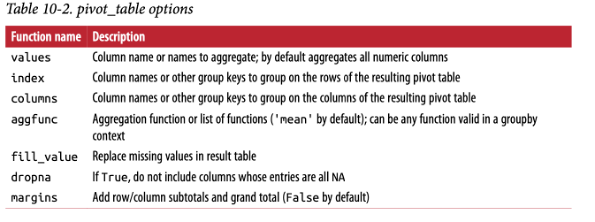

In [132]:
from IPython.display import Image
Image("img/picture75.png")

# Çapraz Tablolar: Crosstab
    Çapraz tablo (veya kısaca çapraz tablo), grup frekanslarını hesaplayan özel bir pivot tablodur. İşte bir örnek:

In [133]:
data

Ohio          0.175345
New York     -0.806473
Vermont            NaN
Florida       1.068155
Oregon        0.245295
Nevada             NaN
California    1.217878
Idaho              NaN
dtype: float64

    Bazı anket analizlerinin bir parçası olarak, bu verileri milliyet ve teslimiyet açısından özetlemek isteyebiliriz. Bunu yapmak için pivot_table'ı kullanabilirsiniz, ancak pandas.crosstab işlevi daha uygun olabilir.

    pd.crosstab(data.Nationality, data.Handedness, margins=True)
    
            Handedness   Left-handed  Right-handed  All
            Nationality
                   Japan    2               3        5 
                   USA      1               4        5 
                   All      3               7       10

    Çapraz tablonun ilk iki bağımsız değişkeninin her biri bir dizi veya Seri veya bir dizi listesi olabilir.

In [134]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244